# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [37]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [38]:
# YOUR CODE HERE
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [39]:
# YOUR CODE HERE
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename, header=0)

df.head(n=10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.


In [40]:
df.shape

(1562, 19)

<font color='#8E8E8E'>First I plan to examine the amount of NaN values, and replace them with the feature mean as needed.</font>

In [41]:
nan_count = np.sum(df.isnull(),axis = 0)
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

<font color='#8E8E8E'> I plan to address the missingness after I selected the features. I will replace them with the mean value of each features.

Next, I hope to check if there are any significant outliers. I decide to use zscore() to see if the data of each column is atypical.
</font>

In [42]:
df_zscores = df.select_dtypes(include=['number']).apply(stats.zscore)
df_zscores.head(10)

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,-1.117604,-1.525966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.602902,0.750862,NaN,NaN,NaN
1,-0.825094,-0.920796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.739834,0.034388,NaN,NaN,NaN
2,-0.532585,-0.602588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.329008,0.063311,NaN,NaN,NaN
3,-0.240075,-1.429479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.574717,0.661279,NaN,NaN,NaN
4,0.052434,-1.473008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.540669,0.740499,NaN,NaN,NaN
5,0.344944,-1.661145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.054498,-0.375746,NaN,NaN,NaN
6,0.637453,-2.054847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.602119,0.491014,NaN,NaN,NaN
7,0.929963,-1.294616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413941,1.304620,NaN,NaN,NaN
8,1.222473,-1.082852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.546106,0.322410,NaN,NaN,NaN
9,1.514982,-2.473509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.447587,1.336588,NaN,NaN,NaN


<font color='#8E8E8E'>We see that the zscore of each features is in a considerable range. Therefore, I think winsorization is not necessary. 

Next, I plan to get the select top five features that correlates with the label (Life Ladder Score). I define the top features through correlation. </font>

In [43]:
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
year,1.000000,-0.014505,0.051140,-0.052845,0.100904,0.134332,-0.014111,-0.051141,-0.024730,0.171805,-0.018925,-0.017400,-0.011016,0.273838,0.209680,-0.053342,-0.026927,0.071773
Life Ladder,-0.014505,1.000000,0.779476,0.700299,0.729852,0.526058,0.204910,-0.425013,0.554462,-0.267492,-0.085543,0.607034,0.706673,-0.154257,-0.756076,-0.097255,-0.172745,-0.294080
Log GDP per capita,0.051140,0.779476,1.000000,0.658591,0.841612,0.362998,-0.000334,-0.350142,0.311868,-0.120597,-0.162000,0.630107,0.770370,-0.086494,-0.566376,-0.342142,-0.314639,-0.355850
Social support,-0.052845,0.700299,0.658591,1.000000,0.586759,0.418213,0.077543,-0.217857,0.459656,-0.352552,-0.160353,0.536387,0.545010,-0.174091,-0.594465,-0.148387,-0.128284,-0.314072
Healthy life expectancy at birth,0.100904,0.729852,0.841612,0.586759,1.000000,0.340026,0.047079,-0.311037,0.297759,-0.105255,-0.188827,0.597106,0.721081,-0.065870,-0.526026,-0.306798,-0.364279,-0.422890
Freedom to make life choices,0.134332,0.526058,0.362998,0.418213,0.340026,1.000000,0.357158,-0.496932,0.615916,-0.284391,0.408096,0.445323,0.486678,-0.081104,-0.369111,0.044033,0.057697,0.108313
Generosity,-0.014111,0.204910,-0.000334,0.077543,0.047079,0.357158,1.000000,-0.305019,0.380896,-0.117508,0.275648,0.118966,0.203871,-0.182119,-0.193145,-0.016602,-0.043810,0.194036
Perceptions of corruption,-0.051141,-0.425013,-0.350142,-0.217857,-0.311037,-0.496932,-0.305019,1.000000,-0.302946,0.267359,-0.436614,-0.322063,-0.514183,0.301730,0.378509,0.158565,0.170775,-0.043064
Positive affect,-0.024730,0.554462,0.311868,0.459656,0.297759,0.615916,0.380896,-0.302946,1.000000,-0.384112,0.144219,0.369666,0.365544,-0.069609,-0.410061,0.371113,0.298045,0.121792
Negative affect,0.171805,-0.267492,-0.120597,-0.352552,-0.105255,-0.284391,-0.117508,0.267359,-0.384112,1.000000,-0.159316,-0.198636,-0.211019,0.510342,0.520042,0.171791,0.074559,0.148413


<font color='#8E8E8E'> From the table above, we see that features have a correlation > 0.5 are: "Log GDP per capita", "Healthy life expectancy at birth", “Social Support,” “Delivery Quality,” “Democratic Quality," "Freedom to make life choices," and "Positive Effect."
    
I confirm this by using pairplot which give us a more straightforward visual representation of their relationship with the label. (Since there are many features, I am only plotting the top four for better visualization and compuational time.)
</font>

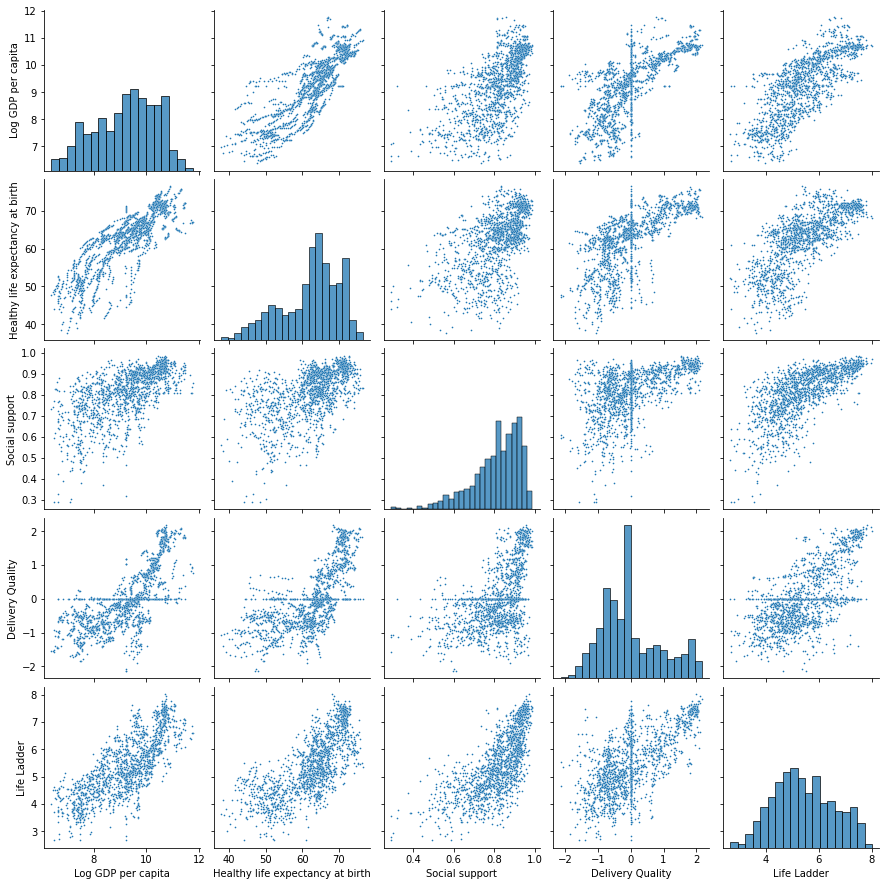

In [116]:
df_sub = df[['Log GDP per capita', 'Healthy life expectancy at birth', 'Social support', 'Delivery Quality','Life Ladder']]
sns.pairplot(data=df_sub, plot_kws={'s':3})

<font color='#8E8E8E'> This further confirmed that these features contributes to the lable we are trying to predict. Next, I use mean imputation and remove the NaN values.</font>

In [117]:
mean_logGDP = df['Log GDP per capita'].mean()
df['Log GDP per capita'].fillna(value=mean_logGDP,inplace=True)
mean_sp = df['Social support'].mean()
df['Social support'].fillna(value=mean_sp,inplace=True)
mean_le = df['Healthy life expectancy at birth'].mean()
df['Healthy life expectancy at birth'].fillna(value=mean_le,inplace=True)
mean_dq = df['Delivery Quality'].mean()
df['Delivery Quality'].fillna(value=mean_dq,inplace=True)
mean_demoq = df['Democratic Quality'].mean()
df['Democratic Quality'].fillna(value=mean_demoq,inplace=True)
mean_pe = df['Positive affect'].mean()
df['Positive affect'].fillna(value=mean_pe,inplace=True)
mean_free = df['Freedom to make life choices'].mean()
df['Freedom to make life choices'].fillna(value=mean_pe,inplace=True)

In [118]:
nan_count = np.sum(df.isnull(),axis = 0)
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                            0
Social support                                                0
Healthy life expectancy at birth                              0
Freedom to make life choices                                  0
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                               0
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                            0
Delivery Quality                                              0
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

<font color='#8E8E8E'>And since my problem is a regression problem, we will not consider class imbalance.
Now we create the features and labels. </font>

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [119]:
X = df[['Log GDP per capita', 'Healthy life expectancy at birth', 'Social support', 'Delivery Quality','Democratic Quality', 'Positive affect','Freedom to make life choices']]
y = df['Life Ladder']

<font color='#8E8E8E'>Instead of using train_test_split() to decide the training and testing data. I want my testing data to be strictly from year 2016 and forward, since my lable is prediciting years in the future, and the model holds more value if we can test only on the latter years.</font>

In [120]:
X_train = X[df['year'] < 2016]
y_train = y[df['year'] < 2016]
X_test = X[df['year'] >= 2016]
y_test = y[df['year'] >= 2016]

# make sure X and y still contains what we want
print(X_train.shape)
print(X_test.shape)

(1279, 7)
(283, 7)


<font color='#8E8E8E'>First, I try to fit the most simple linear regression model and see how the model perform using MSE and R2.</font>

In [121]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

In [122]:
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.5684098983816406
[LR] R2: 0.7458414107328133


<font color='#8E8E8E'>Now, I build a pipeline for my Decision Tree model and run Grid Search on it to find the best hyperparamters.</font>

In [123]:
print('Begin DT pipeline...')
s = [
    ("model", DecisionTreeRegressor())
]

model_pipeline = Pipeline(steps=s)

model_pipeline.fit(X_train, y_train)

y_dt_pred = model_pipeline.predict(X_test)

dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print('End pipeline')

Begin DT pipeline...
End pipeline


In [124]:
param_grid = {'model__max_depth': [4, 6, 8, 10], 
              'model__min_samples_leaf': [30, 40, 50, 60, 70],
             }

In [125]:
print('Running Grid Search...')

grid_DT = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')

grid_search_DT = grid_DT.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [126]:
grid_search_DT.best_estimator_

Pipeline(memory=None,
         steps=[('model',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=8, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=50, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)

In [127]:
dt_best_params = grid_search_DT.best_params_
opt_max_depth = dt_best_params['model__max_depth']
opt_min_samples_leaf = dt_best_params['model__min_samples_leaf']

In [128]:
print('Begin DT pipeline...')
s = [
    ("model", DecisionTreeRegressor(max_depth=opt_max_depth, 
                                    min_samples_leaf=opt_min_samples_leaf))
]

model_pipeline = Pipeline(steps=s)

model_pipeline.fit(X_train, y_train)

y_dt_pred = model_pipeline.predict(X_test)

dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))
print('End pipeline')

Begin DT pipeline...
[DT] Root Mean Squared Error: 0.5847413101029232
[DT] R2: 0.7310267567289732
End pipeline


<font color='#8E8E8E'> We see that although we implement grid search on two hyperparams, the model's performance is only slightly better than our linear regression model. Therefore, I decide to add more hyperparams to my grid search, and see if the performance improve.</font>

In [129]:
param_grid_2 = {'model__max_depth': [4, 6, 8, 10], 
              'model__min_samples_leaf': [30, 40, 50, 60, 70],
              'model__criterion': ['mse', 'mae'],
              'model__splitter': ['best', 'random']}

In [130]:
print('Running Grid Search...')

grid_DT2 = GridSearchCV(model_pipeline, param_grid_2, cv=3, scoring='neg_root_mean_squared_error')

grid_search_DT2 = grid_DT.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [131]:
grid_search_DT2.best_estimator_

Pipeline(memory=None,
         steps=[('model',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=8, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=50, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)

In [132]:
dt_best_params = grid_search_DT.best_params_
opt_max_depth = dt_best_params['model__max_depth']
opt_min_samples_leaf = dt_best_params['model__min_samples_leaf']

In [133]:
print('Begin DT 2 pipeline...')
s = [
    ("model", DecisionTreeRegressor(max_depth=opt_max_depth, 
                                    min_samples_leaf=opt_min_samples_leaf,
                                    criterion='mse',
                                    splitter='best'))
    ]

model_pipeline = Pipeline(steps=s)

model_pipeline.fit(X_train, y_train)

y_dt_pred = model_pipeline.predict(X_test)

dt2_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt2_r2 = r2_score(y_test, y_dt_pred)

print('[DT 2] Root Mean Squared Error: {0}'.format(dt2_rmse))
print('[DT 2] R2: {0}'.format(dt2_r2))
print('End pipeline')

Begin DT 2 pipeline...
[DT 2] Root Mean Squared Error: 0.584741310102923
[DT 2] R2: 0.7310267567289734
End pipeline


<font color='#8E8E8E'> We see slight improvement once again. This implies that Decision Tree model itself might reached its limit on our data. Therefore, we should consider some ensemble menthods on top of decision trees (Gradient Boosting and Random Forest) and see if that give us a better result. </font>

In [134]:
print('Begin GBDT Implementation...')

gbdt_model = GradientBoostingRegressor()

gbdt_model.fit(X_train, y_train)

print('End')

Begin GBDT Implementation...
End


In [135]:
y_gbdt_pred = gbdt_model.predict(X_test)

gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)

gbdt_r2 = r2_score(y_test, y_gbdt_pred)        

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))

[GBDT] Root Mean Squared Error: 0.4893569263105529
[GBDT] R2: 0.8116207748693849


In [136]:
gbdt_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

<font color='#8E8E8E'> Gradient Boost provide us the best performance overall as for right now. But I wish to explore even further and see if I can apply a Grid Search to tune its hyperparameters and improve the model.</font>

In [137]:
param_grid_GBDT = {'max_depth': [2, 4, 6, 8, 10], 
                   'min_samples_leaf': [70, 75, 80],
                   'n_estimators' : [30, 40, 50],
                   'loss':['ls','lad'], # i went back here to test different loss functions
                   'alpha':[0.1, 0.5, 0.8] # regularization parameter
}

In [138]:
print('Running Grid Search for GBDT...')

grid_GBDT = GridSearchCV(gbdt_model, param_grid_GBDT, cv=3, scoring='neg_root_mean_squared_error')

grid_search_GBDT = grid_GBDT.fit(X_train, y_train)

print('Done')

Running Grid Search for GBDT...
Done


In [139]:
grid_search_GBDT.best_estimator_

GradientBoostingRegressor(alpha=0.1, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=70, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [141]:
gbdt_best_params = grid_search_GBDT.best_params_
gbdt_model.set_params(**gbdt_best_params)

GradientBoostingRegressor(alpha=0.1, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=70, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [142]:
print('Begin GBDT Implementation...')

gbdt_model = GradientBoostingRegressor()

gbdt_model.fit(X_train, y_train)

print('End')

Begin GBDT Implementation...
End


In [143]:
y_gbdt_pred = gbdt_model.predict(X_test)

gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)

gbdt_r2 = r2_score(y_test, y_gbdt_pred)        

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))

[GBDT] Root Mean Squared Error: 0.49045009233830805
[GBDT] R2: 0.8107782005860772


<font color='#8E8E8E'> I tested several rounds of grid search, some not included here, but among them the most optimal shows very slight improvement. Now, let's try using random forest and make predictions on multiple decision trees. </font>

In [144]:
print('Begin Random Forest Implementation...')
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_rfdt_pred = rf.predict(X_test)
print('RFDT Done.')

Begin Random Forest Implementation...
RFDT Done.


In [145]:
rfdt_rmse = mean_squared_error(y_test, y_rfdt_pred, squared=False)
rfdt_r2 = r2_score(y_test, y_rfdt_pred)        

print('[RFDT] Root Mean Squared Error: {0}'.format(rfdt_rmse))
print('[RFDT] R2: {0}'.format(rfdt_r2))

[RFDT] Root Mean Squared Error: 0.4963443539707313
[RFDT] R2: 0.8062027103522841


<font color='#8E8E8E'> After testing Random Forest, I'm confident to say that among all models, Gradient Boosted Decision Tree performs the best. Now let's visualize different model's performance through their rmse scores. </font>

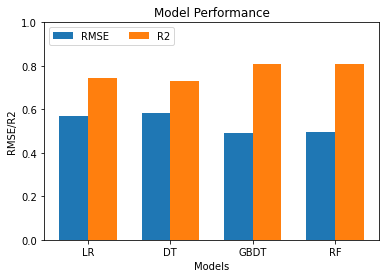

In [146]:
RMSE_Results = [lr_rmse, dt_rmse, gbdt_rmse, rfdt_rmse]
R2_Results = [lr_r2, dt_r2, gbdt_r2, rfdt_r2]
labels = ['LR', 'DT', 'GBDT', 'RF']

rg= np.arange(4)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

<font color='#8E8E8E'> Based on these results, it seems that the ensemble methods, like Gradient Boosting and Random Forest, outperform the single decision tree and linear regression models in terms of both RMSE and R2. Gradient Boosting appears to be the best-performing model among all the tested models.</font>

<font color='#8E8E8E'> Among methods in improving model performance, we've tried tuning hyperparameters, regularization, ensemble techniques, and etc. Finally, I want to try if feature selection may make a difference on the model performance. I'll change the number of features in the training and testing data, and since we have our optimal model, compare its rmse and r2 scores when theres different number of features. </font>

In [140]:
X2 = df[['Log GDP per capita', 'Healthy life expectancy at birth', 'Social support', 'Delivery Quality']]
y2 = df['Life Ladder']

In [147]:
X2_train = X2[df['year'] < 2016]
y2_train = y2[df['year'] < 2016]
X2_test = X2[df['year'] >= 2016]
y2_test = y2[df['year'] >= 2016]

In [148]:
print('Begin GBDT Implementation...')

gbdt_model = GradientBoostingRegressor()

gbdt_model.fit(X2_train, y2_train)

print('End')

Begin GBDT Implementation...
End


In [150]:
y2_gbdt_pred = gbdt_model.predict(X2_test)

gbdt2_rmse = mean_squared_error(y2_test, y2_gbdt_pred, squared=False)

gbdt2_r2 = r2_score(y2_test, y2_gbdt_pred)        

print('[GBDT, 4 features] Root Mean Squared Error: {0}'.format(gbdt2_rmse))
print('[GBDT, 4 features] R2: {0}'.format(gbdt2_r2))

[GBDT, 4 features] Root Mean Squared Error: 0.5499553186042837
[GBDT, 4 features] R2: 0.7620770479552983


In [ ]:
RMSE_Results = [gbdt_rmse, gbdt2_rmse]
R2_Results = [gbdt_r2, gbdt2_r2]
labels = ['6 features', '4 features']

rg= np.arange(2)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

<font color='#8E8E8E'> We can see that reducing features would reduce its performance too, more significant than tuning hyperparamters. However, less features require less computational power. In future datasets, I would also consider finding a balance in time efficiency and model performance. 

In conclusion, we see that Gradient Boosting after grid search with 6 features is the best model as for right now. If I ever wish to move forward, I might consider obtaining data from more recent years and putting "countries" in consideration. Especially for the ladder, "countries" may play a important role in its life ladder score, and the model could enhance if we have sufficient data on all countries and develop a model for each.  </font>